## Rayleigh-Jeans law vs. blackbody

### Here are two ways to write the Rayleigh-Jeans law, which is the long-wavelength approximation to the blackbody:

### $B_{\lambda}(T) = \frac{2 c k_b T}{\lambda^4}$     units: J / (s m$^2$ m) = J / (s m$^3$)
### $B_{\nu}(T) = \frac{2 k_b \nu^2 T}{c^2}$     units: J / (s m$^2$ Hz) = J / m$^2$

Boltzmann's constant: $k_b = 1.38 \times 10^{-23}$ J/K

### Here's the actual blackbody law:

### $\mathcal{I}(\lambda, T) = B_{\lambda}(T) = \frac{2 \pi c^2 h}{\lambda^5} \frac{1}{e^{hc/\lambda k T} - 1}$     units: J / (s m$^2$ m) = J / (s m$^3$)
### $\mathcal{I}(\nu, T) = B_{\nu}(T) = \frac{2 h \nu^3}{c^2} \frac{1}{e^{h \nu / kT} - 1}$     units: J / (s m$^2$ Hz) = J / m$^2$

Planck's constant: $h = 6.626 \times 10^{−34}$ J/Hz = J $\cdot$ s

Although your book uses $\mathcal{I}$ for intensity, it's common for physicists and astronomers to use $B$ to stand for blackbody. We also sometimes use $F$ to stand for flux or flux density, as you will see further down the page.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
from IPython.display import Image, display

# Make readable plots
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", "font.sans-serif":"Arial"})

In [2]:
RayleighJeans_wavelength = lambda wave, T: 2 * constants.c * constants.k * T / wave**4
RayleighJeans_frequency = lambda freq, T: 2 * constants.k * freq**2 * T / constants.c**2

def blackbody(lam, T):
    nu = constants.c / lam
    return (2*np.pi/constants.c**2) * constants.h*nu**3 / (np.exp(constants.h*nu/(constants.k*T))-1)
    
"""These functions are built for input wavelengths in METERS"""

'These functions are built for input wavelengths in METERS'

### The Rayleigh-Jeans law and the ultraviolet catastrophe

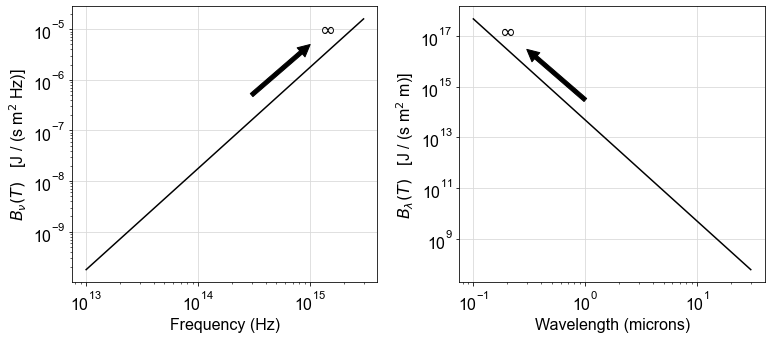

In [3]:
"""Ultraviolet catastrophe demo"""
micron_to_meter = 1e-6
waves = np.linspace(0.1, 30, num=301, endpoint=True) * micron_to_meter # Covers 0.1-10 microns = 100-10000 nm
freqs = constants.c / waves

T_demo = 5800 # Kelvins

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5))

ax1.loglog(freqs, RayleighJeans_frequency(freqs, T_demo), color='k')
ax1.annotate('', xy=(1e15, 5e-6), xytext=(3e14, 5e-7), 
            arrowprops=dict(facecolor='black', shrink=0.)) # Draw arrow
ax1.text(1.2e15, 8e-6, r"$\infty$", fontsize='large')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel(r"$B_{\nu}(T)$   [J / (s m$^2$ Hz)]")
ax1.grid(color='0.85')

ax2.loglog(waves / micron_to_meter, RayleighJeans_wavelength(waves, T_demo), color='k')
ax2.annotate('', xy=(0.3, 3e16), xytext=(1, 3e14), 
            arrowprops=dict(facecolor='black', shrink=0.)) # Draw arrow
ax2.text(0.17, 1e17, r"$\infty$", fontsize='large')
ax2.set_xlabel('Wavelength (microns)')
ax2.set_ylabel(r"$B_{\lambda}(T)$   [J / (s m$^2$ m)]")
ax2.grid(color='0.85')

plt.tight_layout()

Clearly it's impossible for anything to have infinite energy density.

### True blackbody spectrum

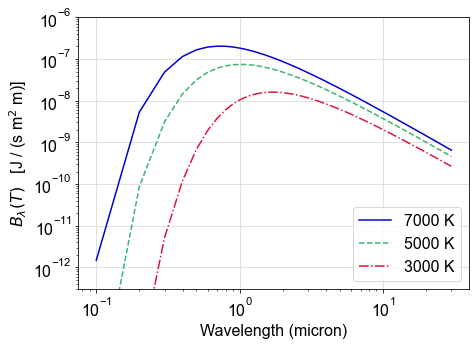

In [4]:
"""True blackbody demo"""

colors = ['mediumblue', 'mediumseagreen', 'crimson']
lines = ['-', '--', '-.']
temps = [7000, 5000, 3000]

plt.figure(figsize=(7,5))
for i, t in enumerate(temps):
    plt.loglog(waves/micron_to_meter, blackbody(waves, t), color=colors[i], ls=lines[i], label=f"{t}"+' K')
plt.xlabel('Wavelength (micron)')
plt.ylabel(r"$B_{\lambda}(T)$   [J / (s m$^2$ m)]")
plt.ylim(3e-13,1e-6)
plt.legend(loc='best')
plt.grid(color='0.85')

Blackbodies are a big part of astronomy. The figure below is from my latest paper, which is being revised for re-submission to <em>Astronomy and Astrophysics</em> (Yang, Liu, Kennedy, Wyatt, Dodson-Robinson, Akeson, & Liao 2024). It shows the spectral energy distribution of a star that's surrounded by two thin rings of dust grains. We think the dust rings are produced by colliding planetesimals similar to our own asteroids and Kuiper Belt objects. The dust can't help but absorb starlight, and in order to maintain thermal equilibrium, it must re-radiate the energy it absorbs. The basic principle is<br />

energy out = energy in<br />

Although the star is brighter than the dust by a factor of $\approx 50000$ if you consider all wavelengths of light together, at specific wavelengths in the mid- and far-infrared, the dust is brighter than the star. We find dust rings by looking for the "excess" infrared emission over and above what the star produces. We measure the temperatures of dust rings by fitting a blackbody model to the data. Of course a ring of dust is not a giant blackbody cavity in space; we are making the simplifying assumption that each grain of dust in the ring behaves roughly like a blackbody (or modified blackbody for cold dust that must radiate long-wavelength light; see below), so our models actually represent the sum of the light coming from lots of tiny blackbodies.

The orange curve shows the total flux density from the star and the dust rings combined as a function of wavelength. Our model for the total flux density is a sum of three components: a stellar atmosphere model ($F_{\nu, star}$, blue), which is close to a blackbody but has bumps and wiggles from absorption lines (which we will talk about later in this unit); a pure blackbody model for the inner dust ring ($F_{\nu, disc_w}$, red; $w$ stands for warm), and a modified blackbody for the outer dust ring ($F_{\nu, disc_c}$, green; $c$ stands for cold). The modified blackbody model takes into account the fact that dust grains cannot efficiently radiate light at wavelengths larger than their circumference. The red dots with error bars are previous observations, and the black dot on the lower right shows the new measurement at $\lambda = 1.2$ mm in our paper. 

The y-axis units are Janskys, abbreviated Jy; 1 Jy = $10^{-26}$ W/m$^2$/Hz. Astronomers enjoy weird combinations of units. Jy are dimensionally the same unit as in the left-hand plot from the Rayleigh-Jeans ultraviolet catastrophe demo plots (the only thing different is the factor of $10^{-26}$). But the plot below has the x-axis units of the right-hand plot from the ultraviolet catastrophe demo. It would make more sense to stick with either frequency or wavelength and not mix the two (which is how I set up the ultraviolet catastrophe plots), but we are using mixed units in the paper, as is the convention.

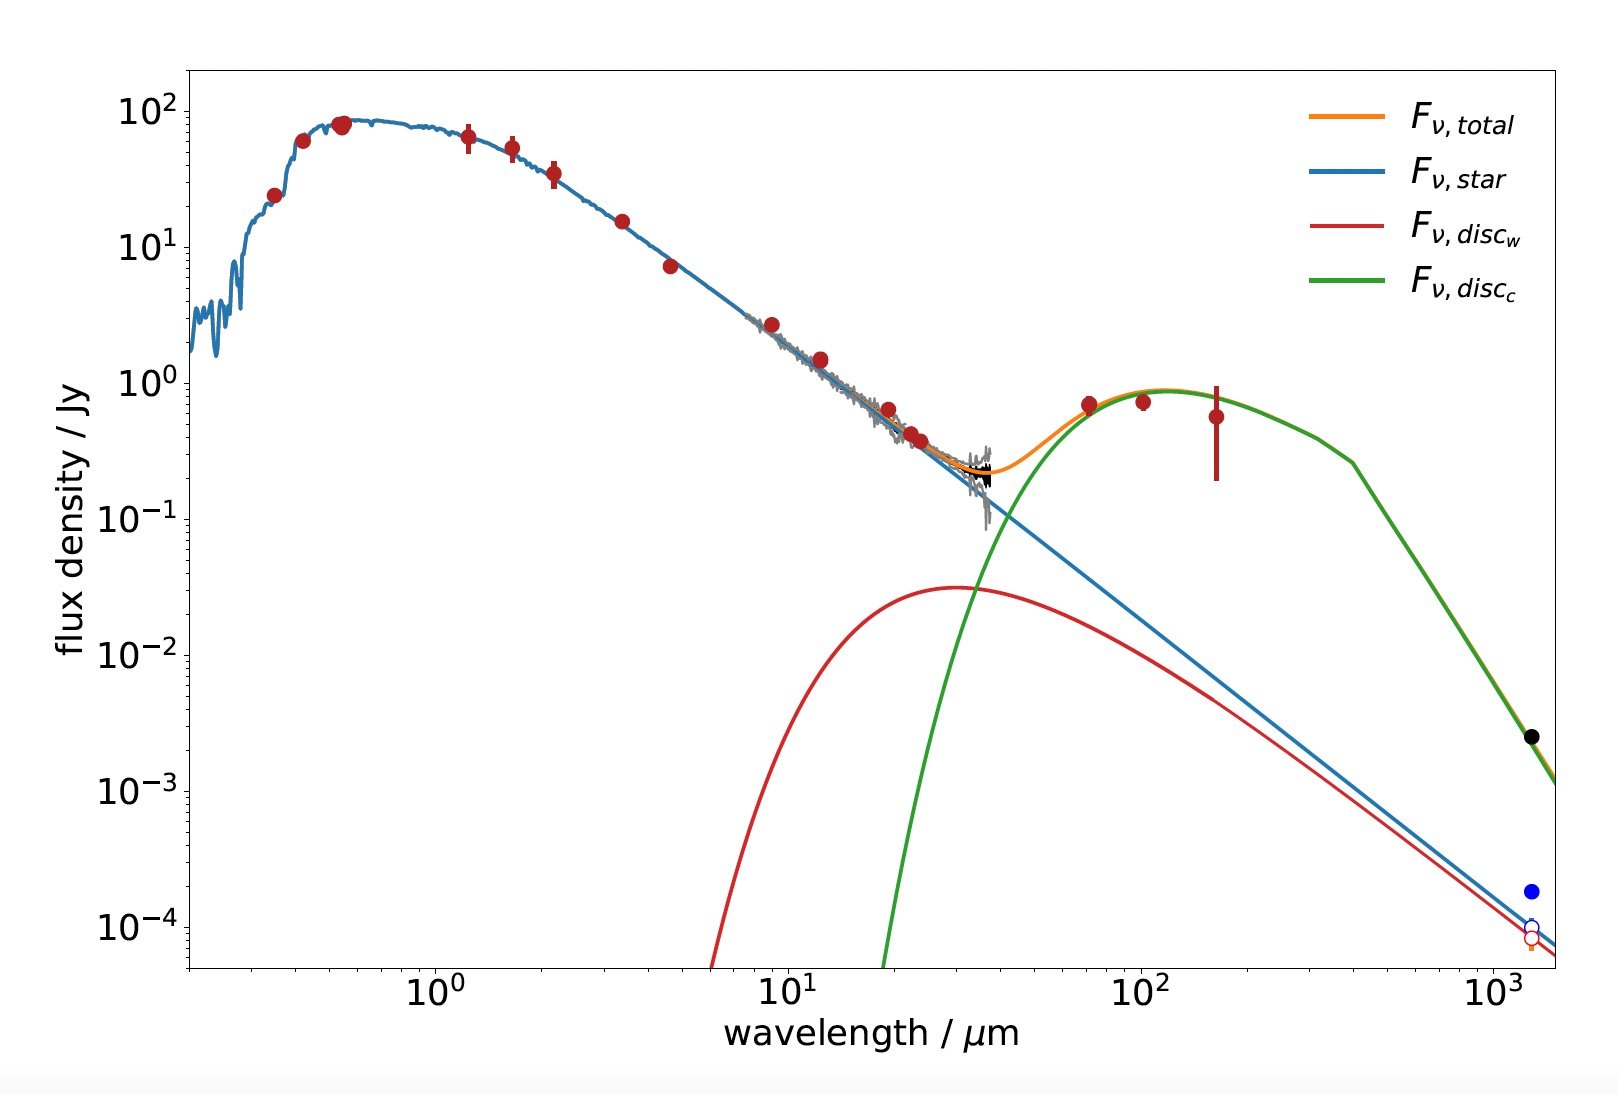

In [6]:
display(Image(filename='etaCru_SED.jpg'))

Here is a picture of the star-disk system taken in radio light. You can easily see the outer dust ring. The inner dust ring is too close to the star to be separated from it ("unresolved", as we say; if you're in PHYS 313 you can talk with Prof. DeCamp about what that means), but we know it's there because the bright spot in the center of the image is much brighter than the star by itself would be. The white spot on the lower left shows the resolution unit or "beam size".

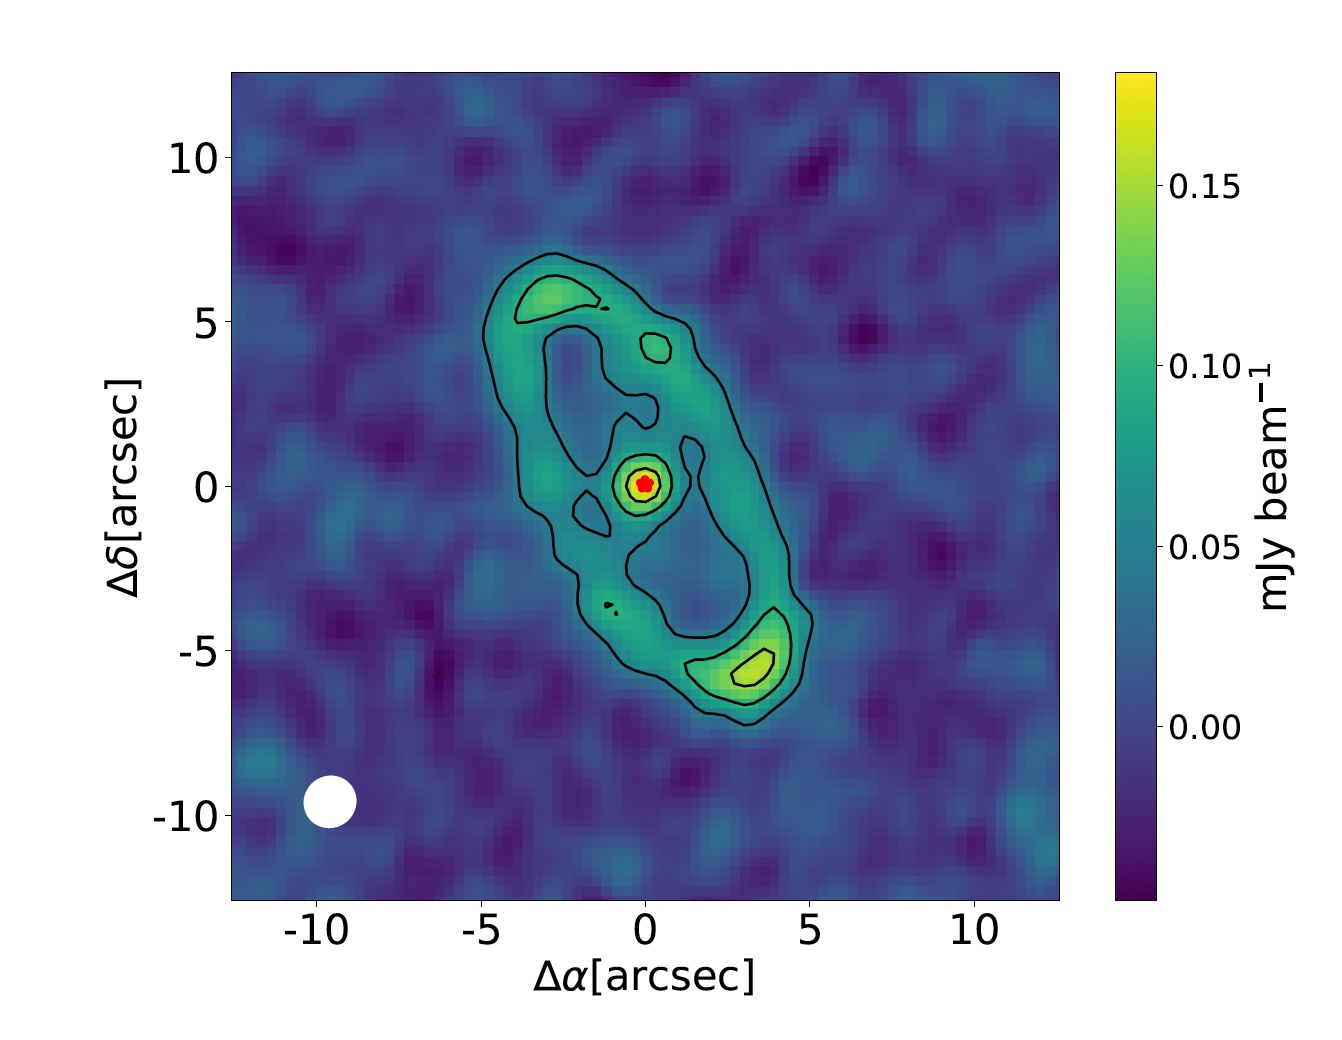

In [7]:
display(Image(filename='etaCru_band6.jpg'))

Here is another SED that features a modified blackbody model of far-infrared dust emission. This is from Inbok Yea's PhD thesis, and the study has been submitted to the Astronomical Journal for publication (Yea, Dodson-Robinson, Sanchez, Gizis 2024). Note that the wavelength units are different: Angstroms ($10^{-10}$ m) instead of microns ($10^{-6}$ m).

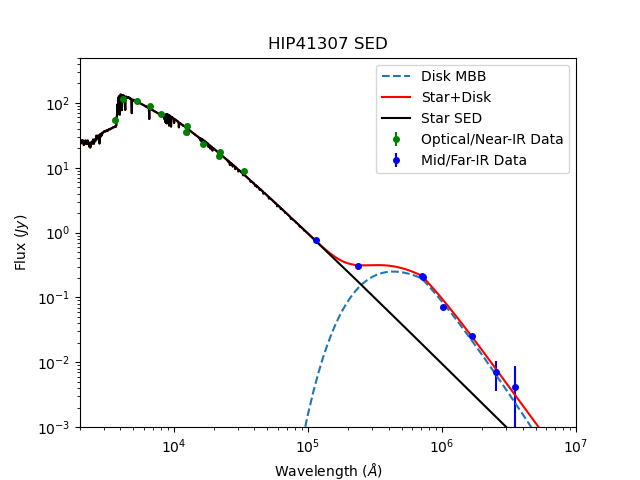

In [8]:
display(Image(filename='/Users/sdr/Dropbox/2mass_paper/Figures/HIP41307_SED.png'))